In [1]:
from scipy.interpolate import UnivariateSpline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

In [2]:
def GrowthRate(Data:np.array,TStep:int=5):

        N1 = Data[:-1]
        N2 = Data[1:]

        Kvec = (N2-N1)/TStep

        return Kvec


def GrowthCurveProcesser(dataframe,timecol='Time'):    

    epsilon = 0.01
    
    dataframe[timecol] = np.arange(0,len(df.index)*5,5)/60
    
    kept = df.columns[1:]
        
    splitkept.append(column.split('_')[0])
        
    df = df[kept]

    kept, splitkept = np.asarray(kept), np.asarray(splitkept)

    strainODs = {}
    strainSplines = {}
    strainGrowthRates = {}
    
    Time = np.asarray(df.Time)

    for strain in np.unique(splitkept):
        if strain == 'Time':
            continue 
            
        mu = df[kept[(splitkept == strain).nonzero()]].mean(axis=1)
        
        spl = UnivariateSpline(Time,mu,s=0.5)

        k = np.zeros(mu.shape)
    
        k[1:] = GrowthRate(spl(Time))
        k[0] = k[1]
    
        strainODs[strain] = mu
        strainSplines[strain] = spl(Time)
        strainGrowthRates[strain] = k

    
    return strainODs, strainSplines, strainGrowthRates

In [4]:
epsilon = 0.01

timecol='Time'

dataframe = pd.read_csv('https://github.com/OReyesMatte/MEDUSSA/raw/refs/heads/main/Figures/FigureS5/GrowthCurves.csv')

dataframe = dataframe.dropna()

dataframe[timecol] = np.arange(0,len(dataframe.index)*5,5)/60

kept = dataframe.columns[1:]
    
splitkept = [col.split('_')[0] for col in kept]
    
kept_dataframe = dataframe[kept]

kept, splitkept = np.asarray(kept), np.asarray(splitkept)

strainODs = {}
strainSplines = {}
strainGrowthRates = {}

time_ = np.asarray(dataframe[timecol])

strains = np.unique(splitkept)

for strain in strains:
                    
    mu = dataframe[kept[(splitkept == strain).nonzero()]].mean(axis=1)

    mu = np.log(mu + epsilon)
    
    spl = UnivariateSpline(time_,mu,s=0.5)

    k = np.zeros(mu.shape)

    k[1:] = GrowthRate(spl(time_))
    k[0] = k[1]

    strainODs[strain] = mu
    strainSplines[strain] = spl(time_)
    strainGrowthRates[strain] = k

In [5]:
df_OD = pd.DataFrame(strainODs)
df_OD['Time'] = np.arange(0,len(df_OD.index)*5,5)/60

df_rate = pd.DataFrame(strainGrowthRates)
df_rate['Time'] = np.arange(0,len(df_rate.index)*5,5)/60

df_spline = pd.DataFrame(strainSplines)
df_spline['Time'] = np.arange(0,len(df_spline.index)*5,5)/60

/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_92200/1878757334.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_92200/1878757334.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_92200/1878757334.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_92200/1878757334.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

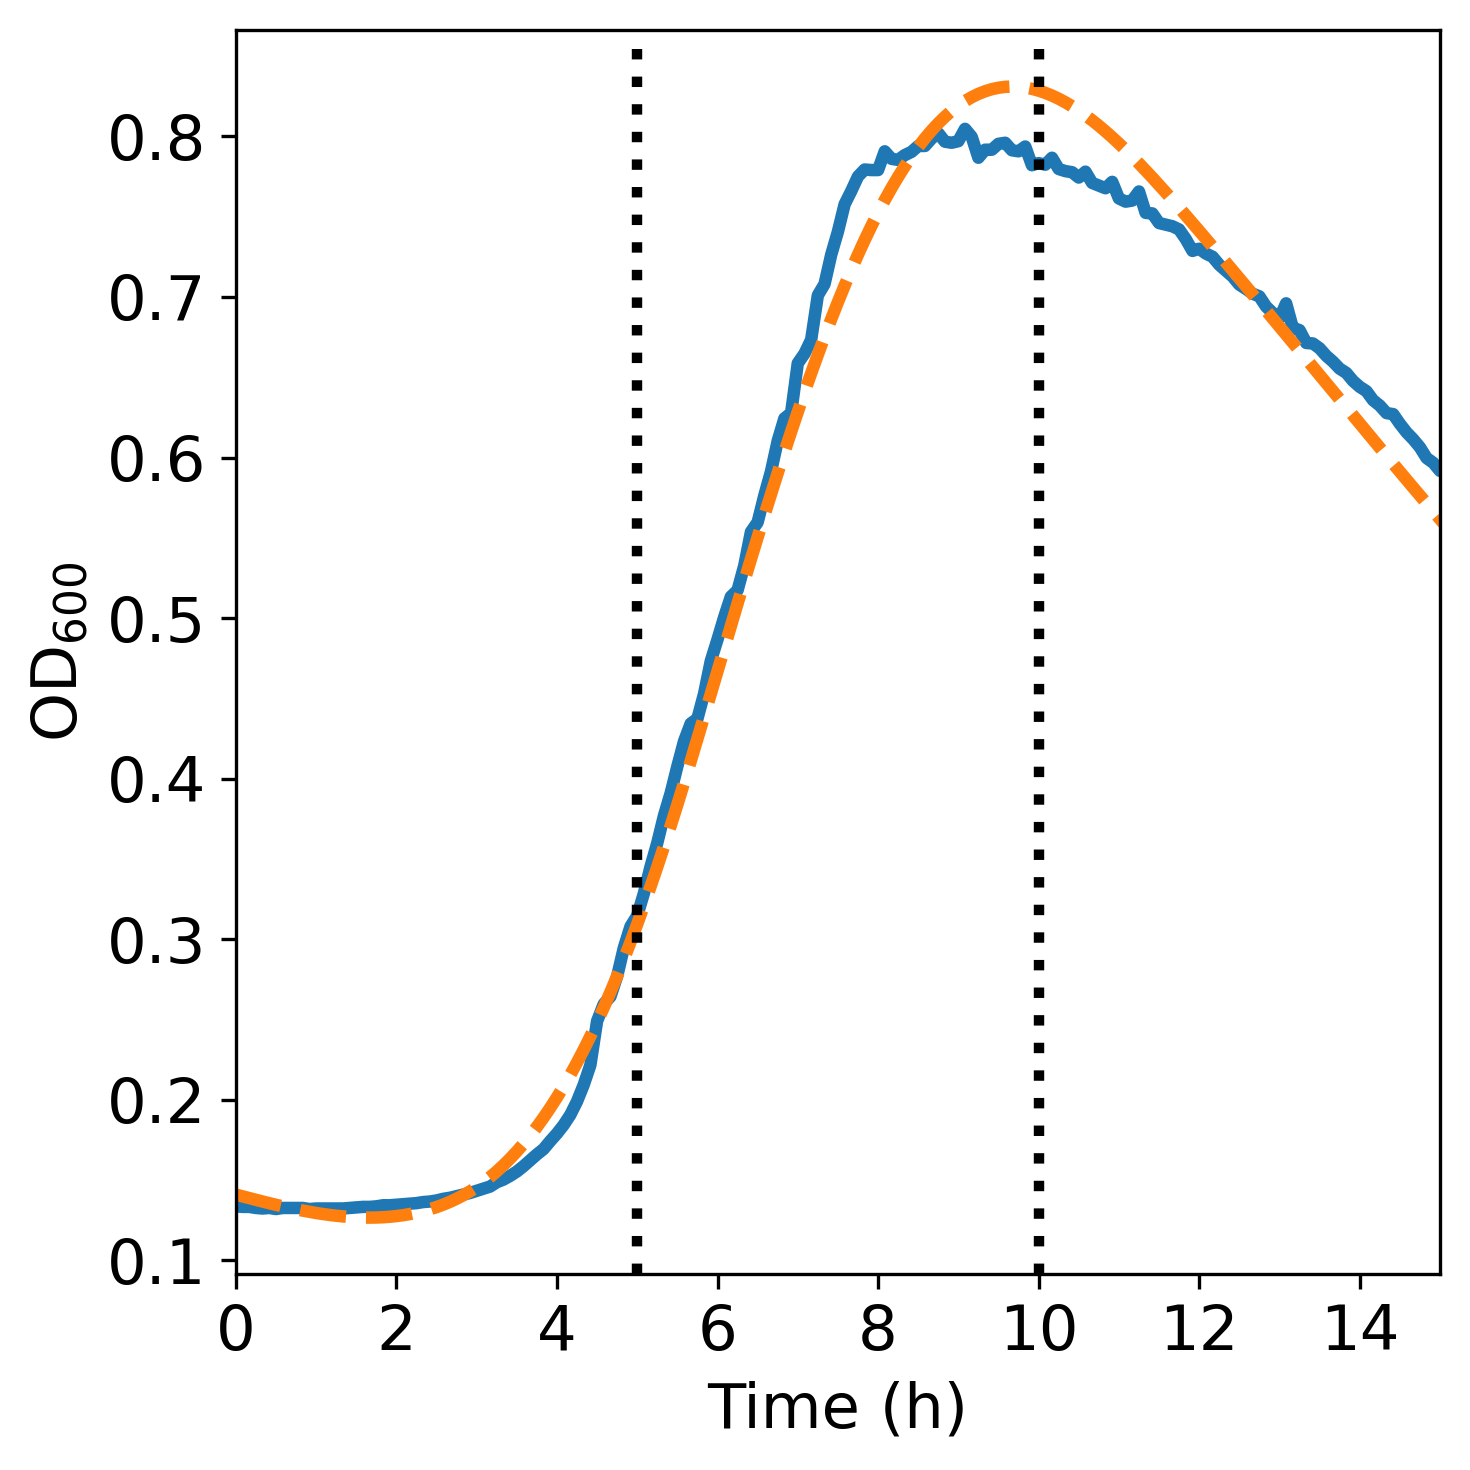

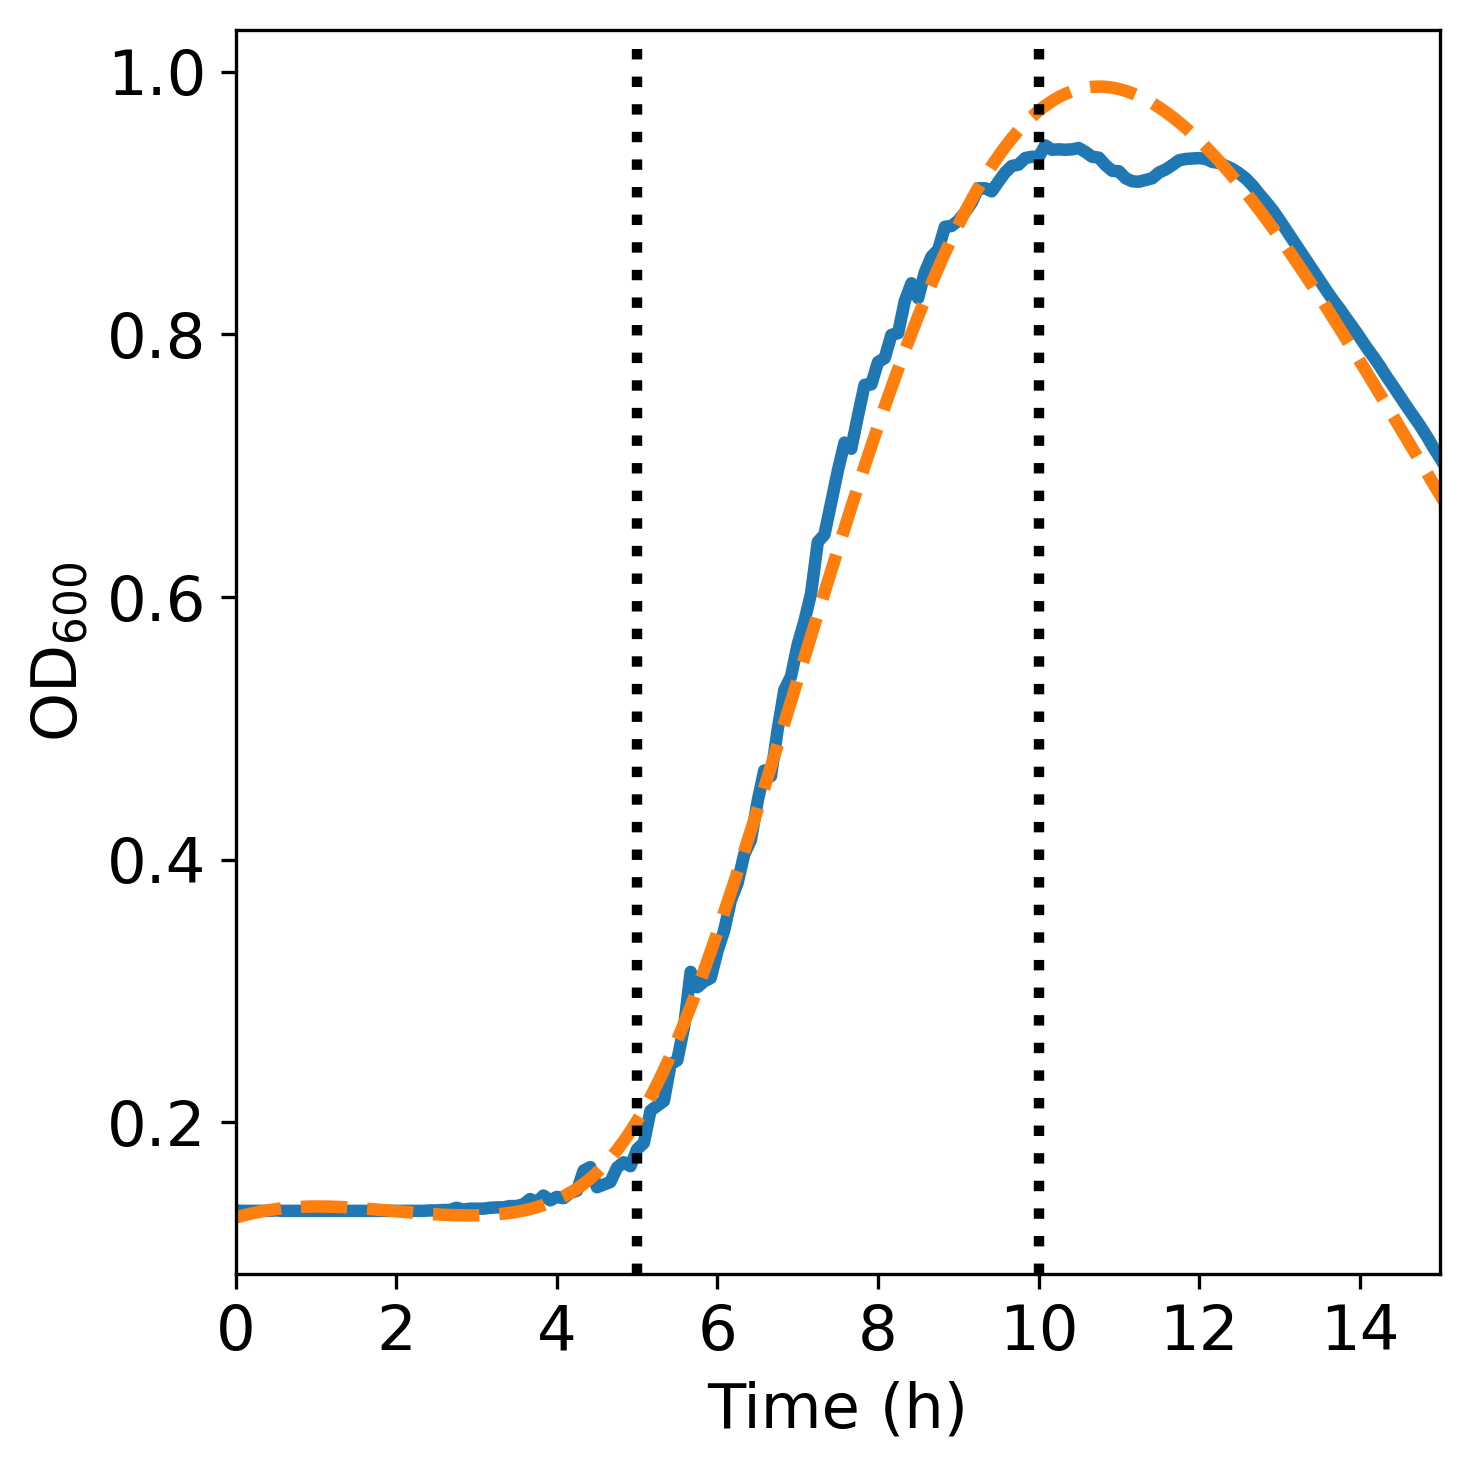

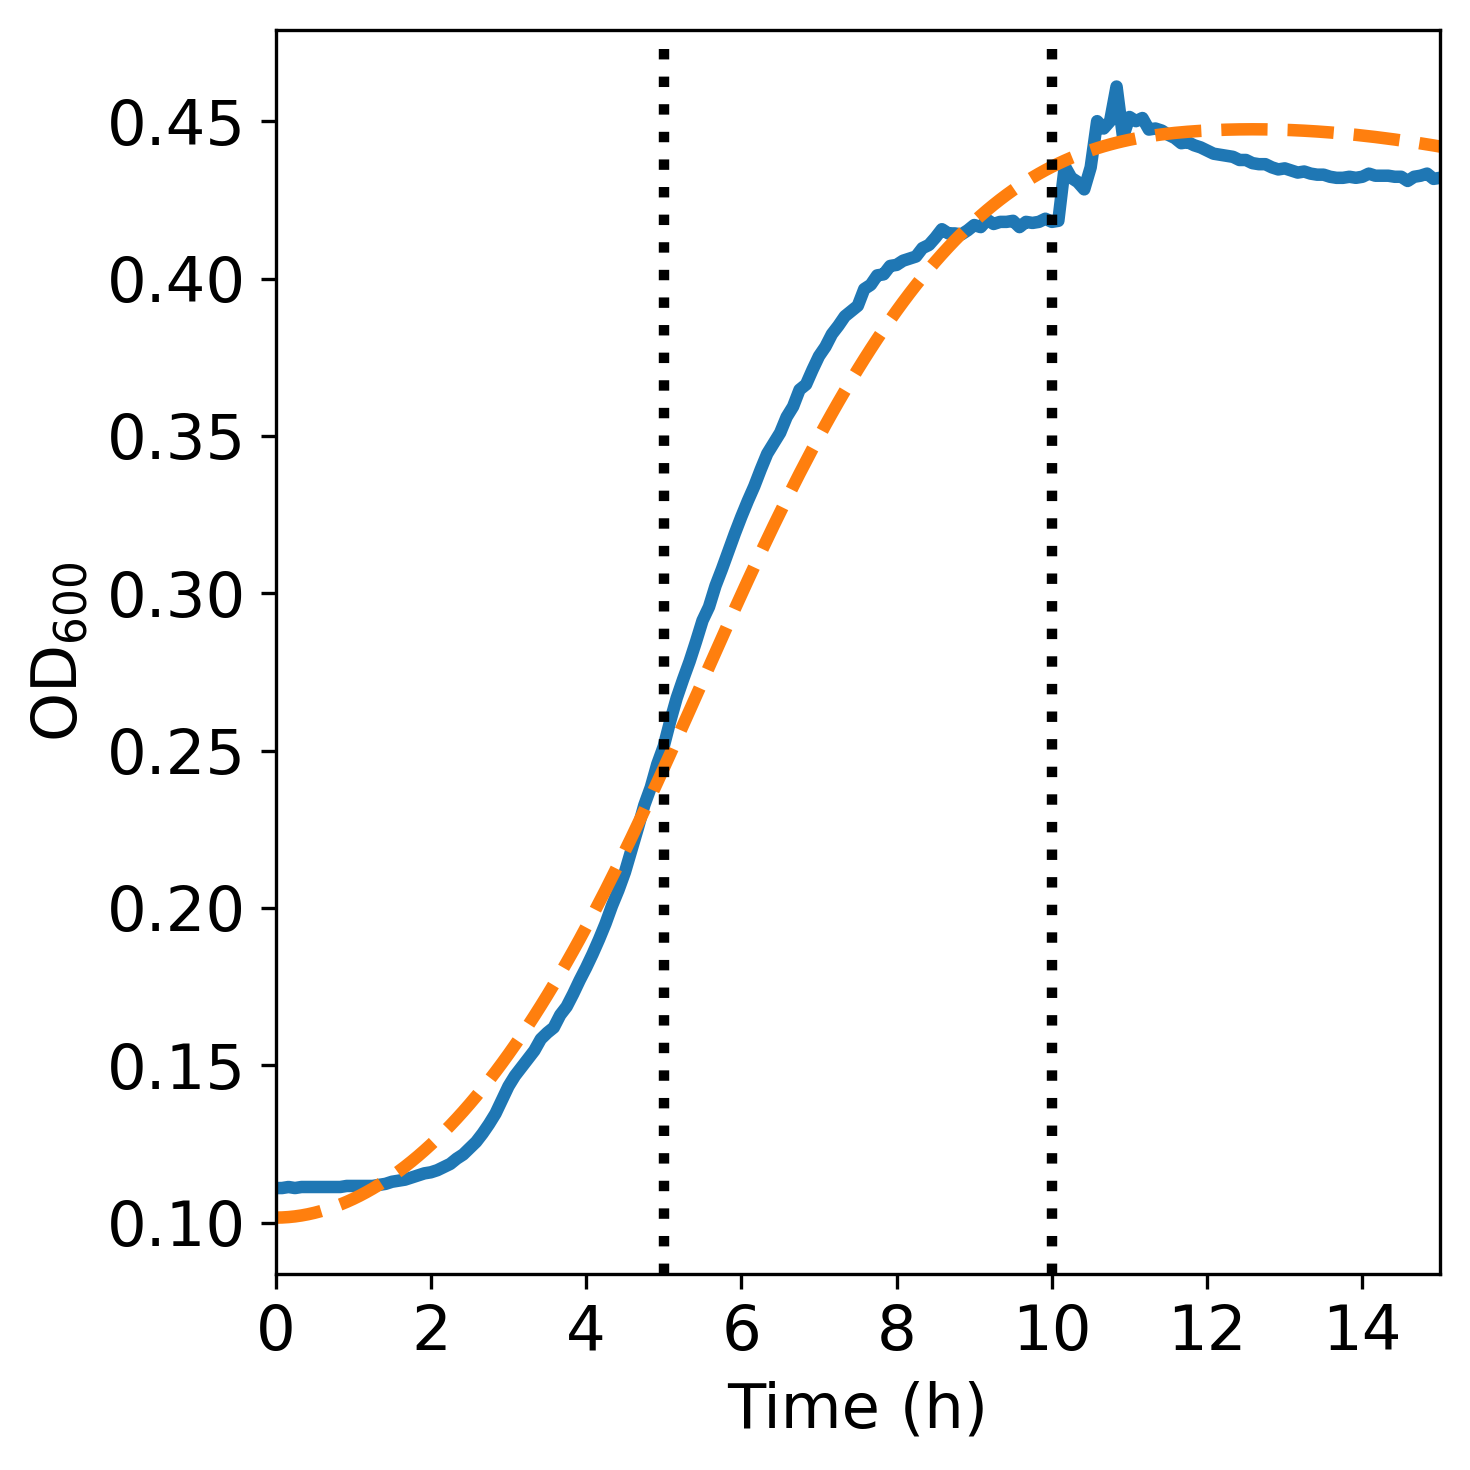

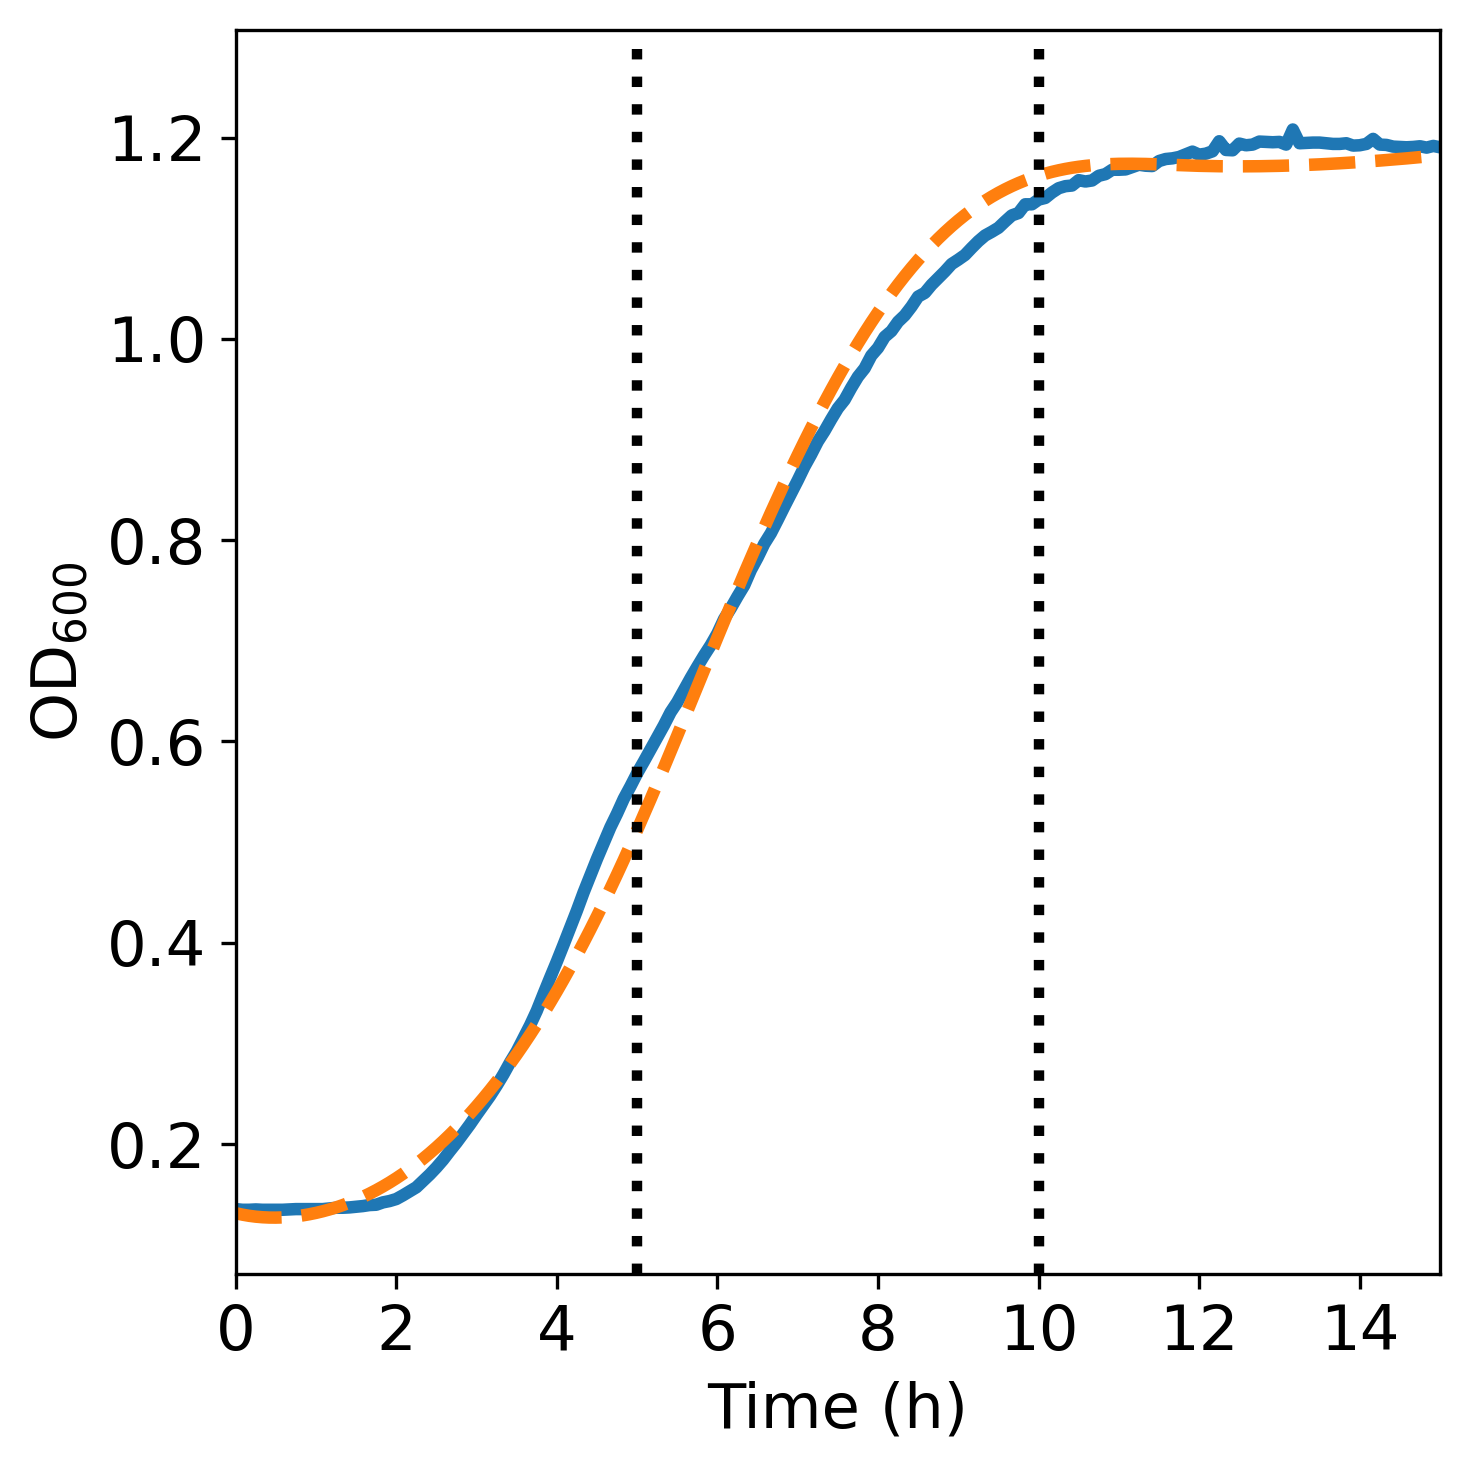

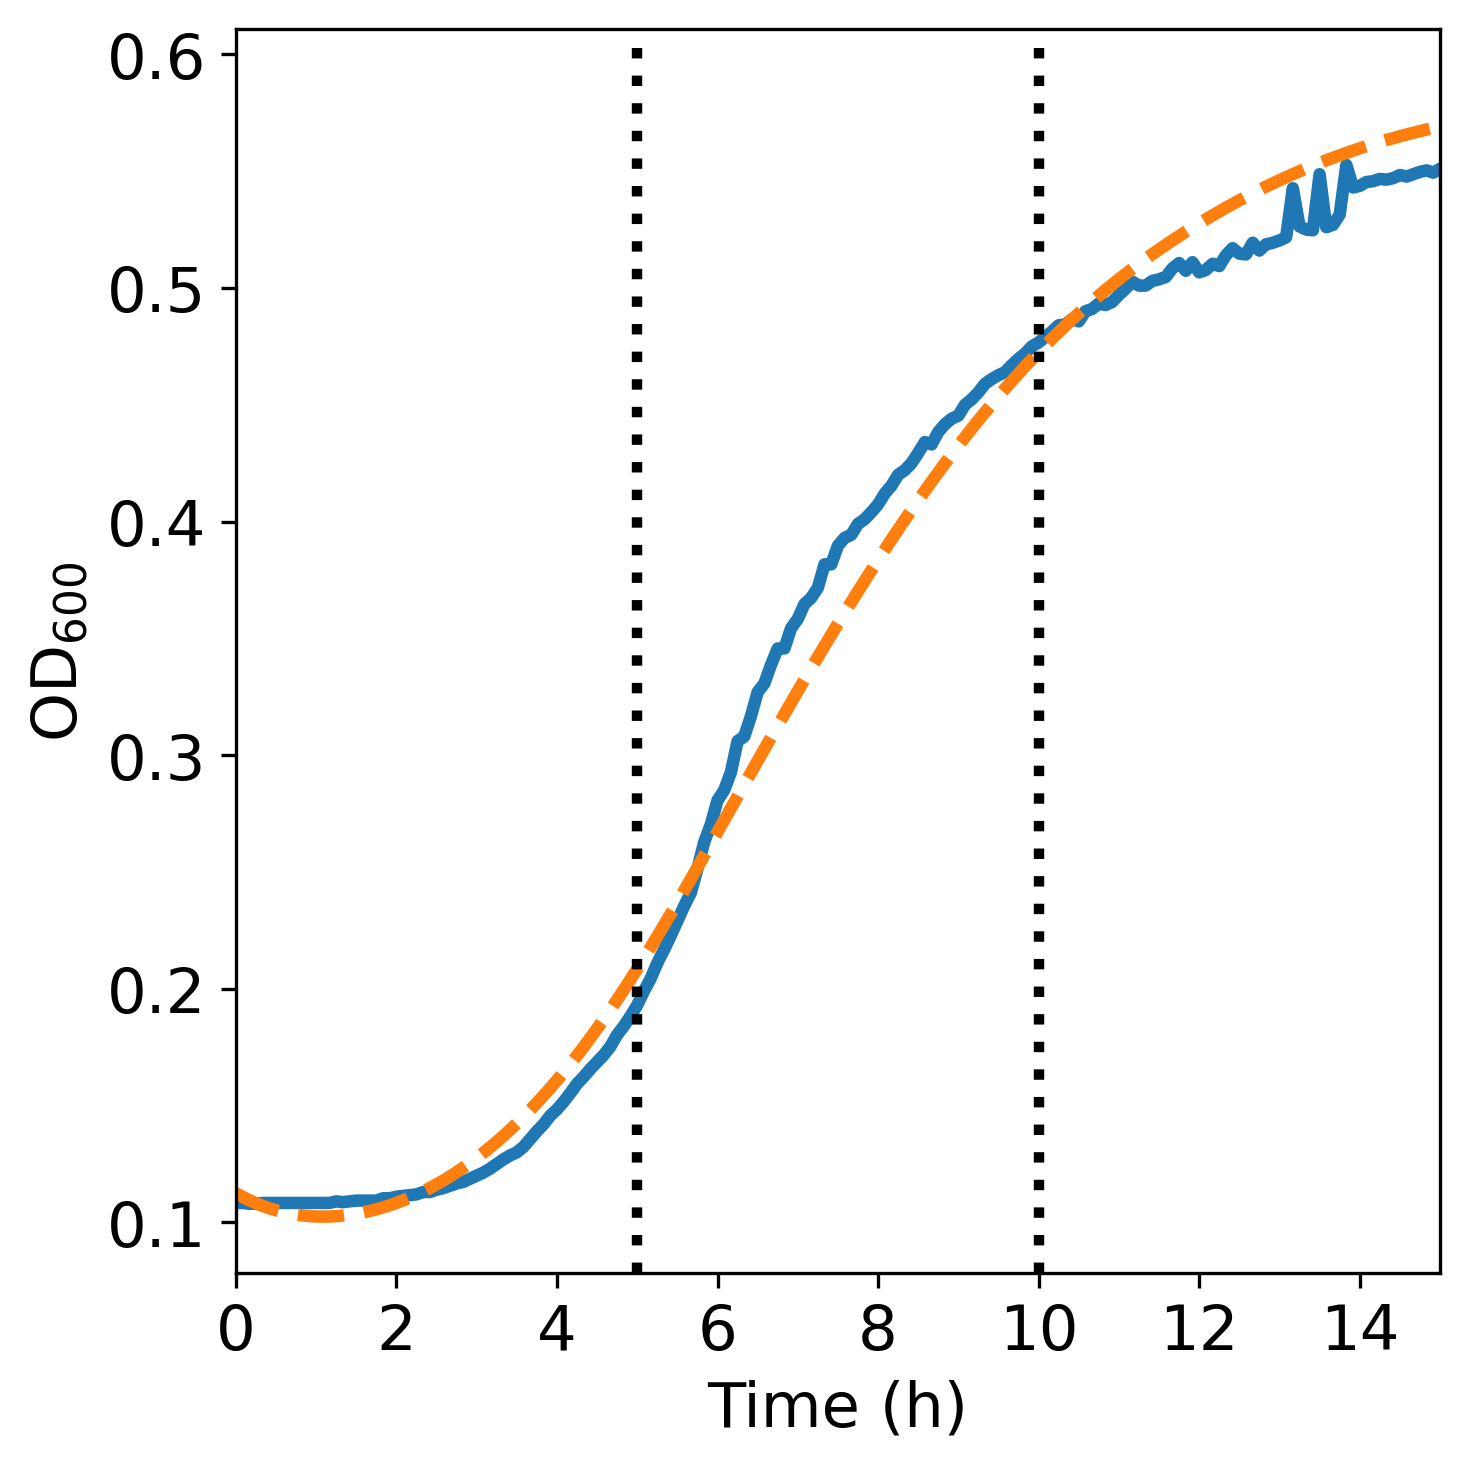

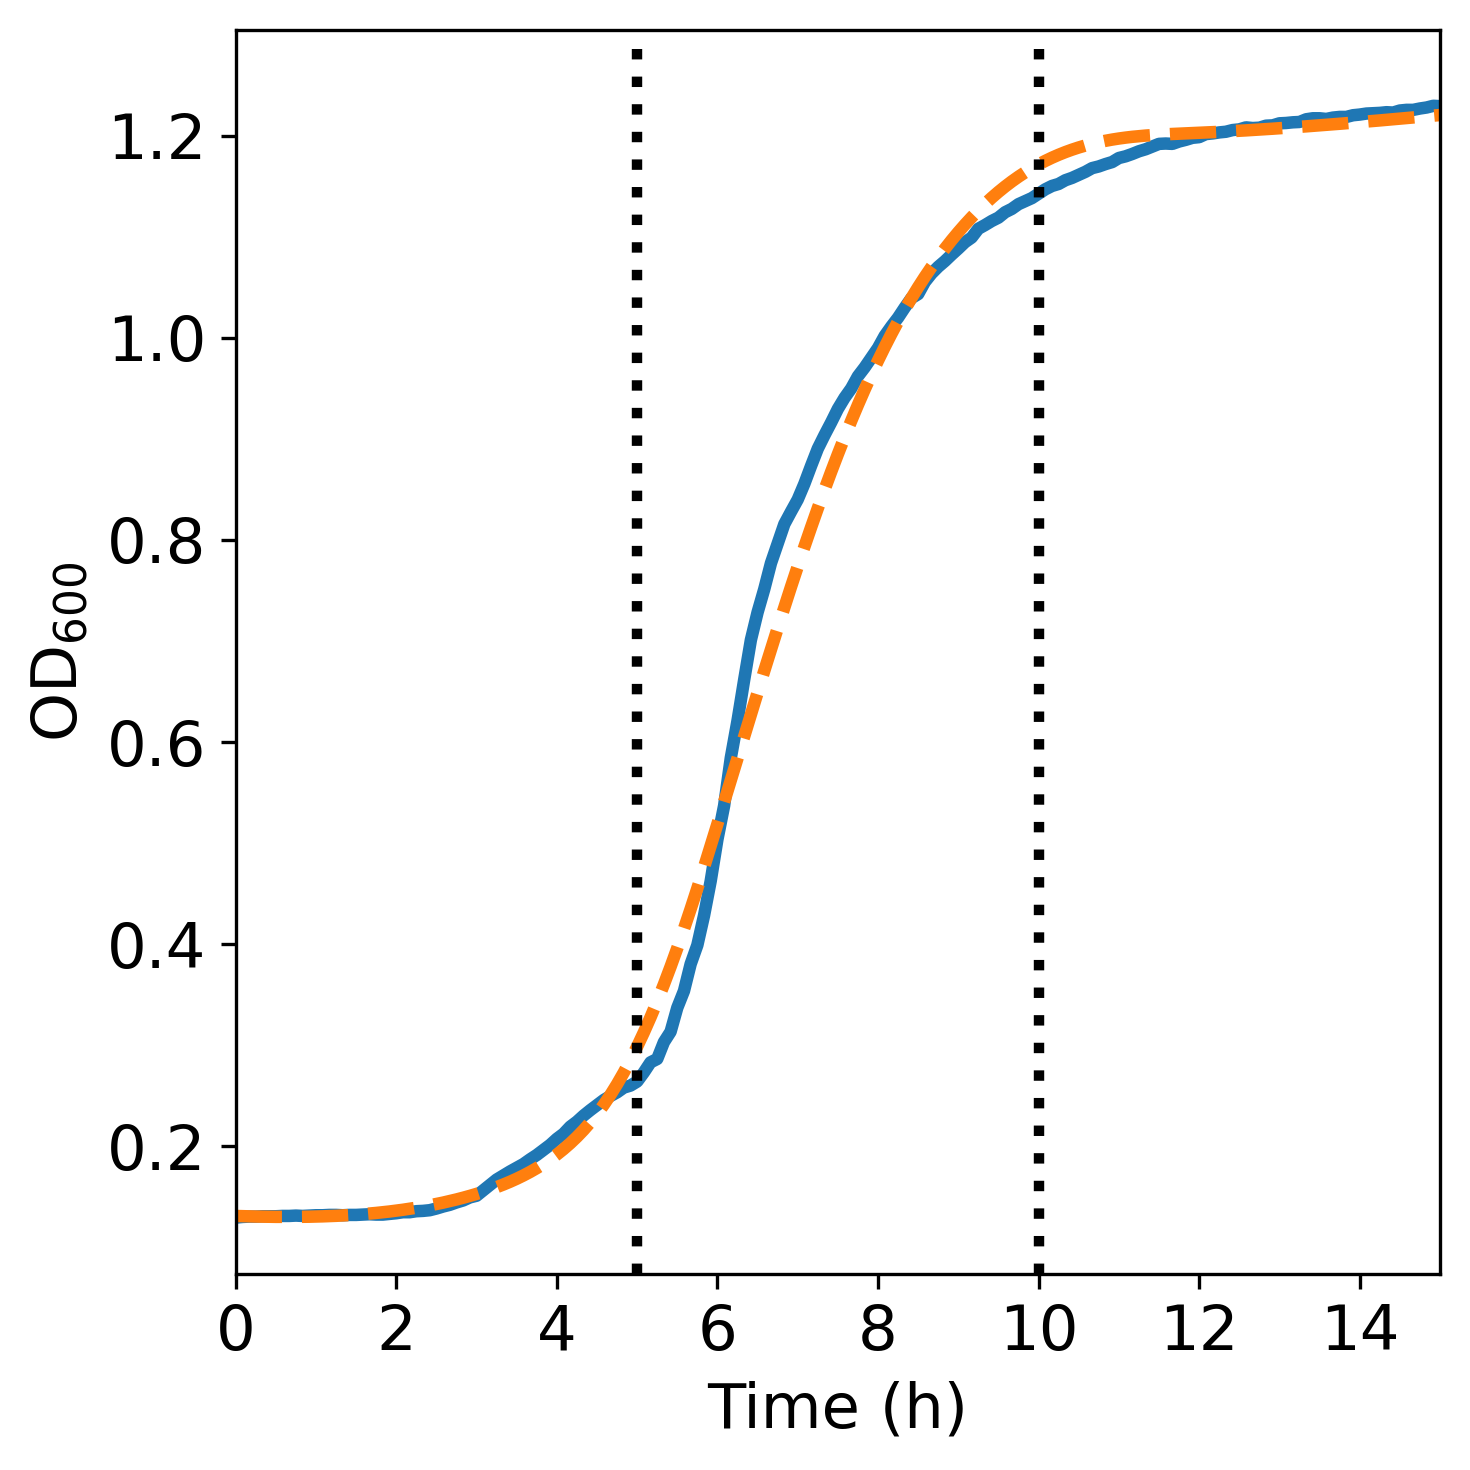

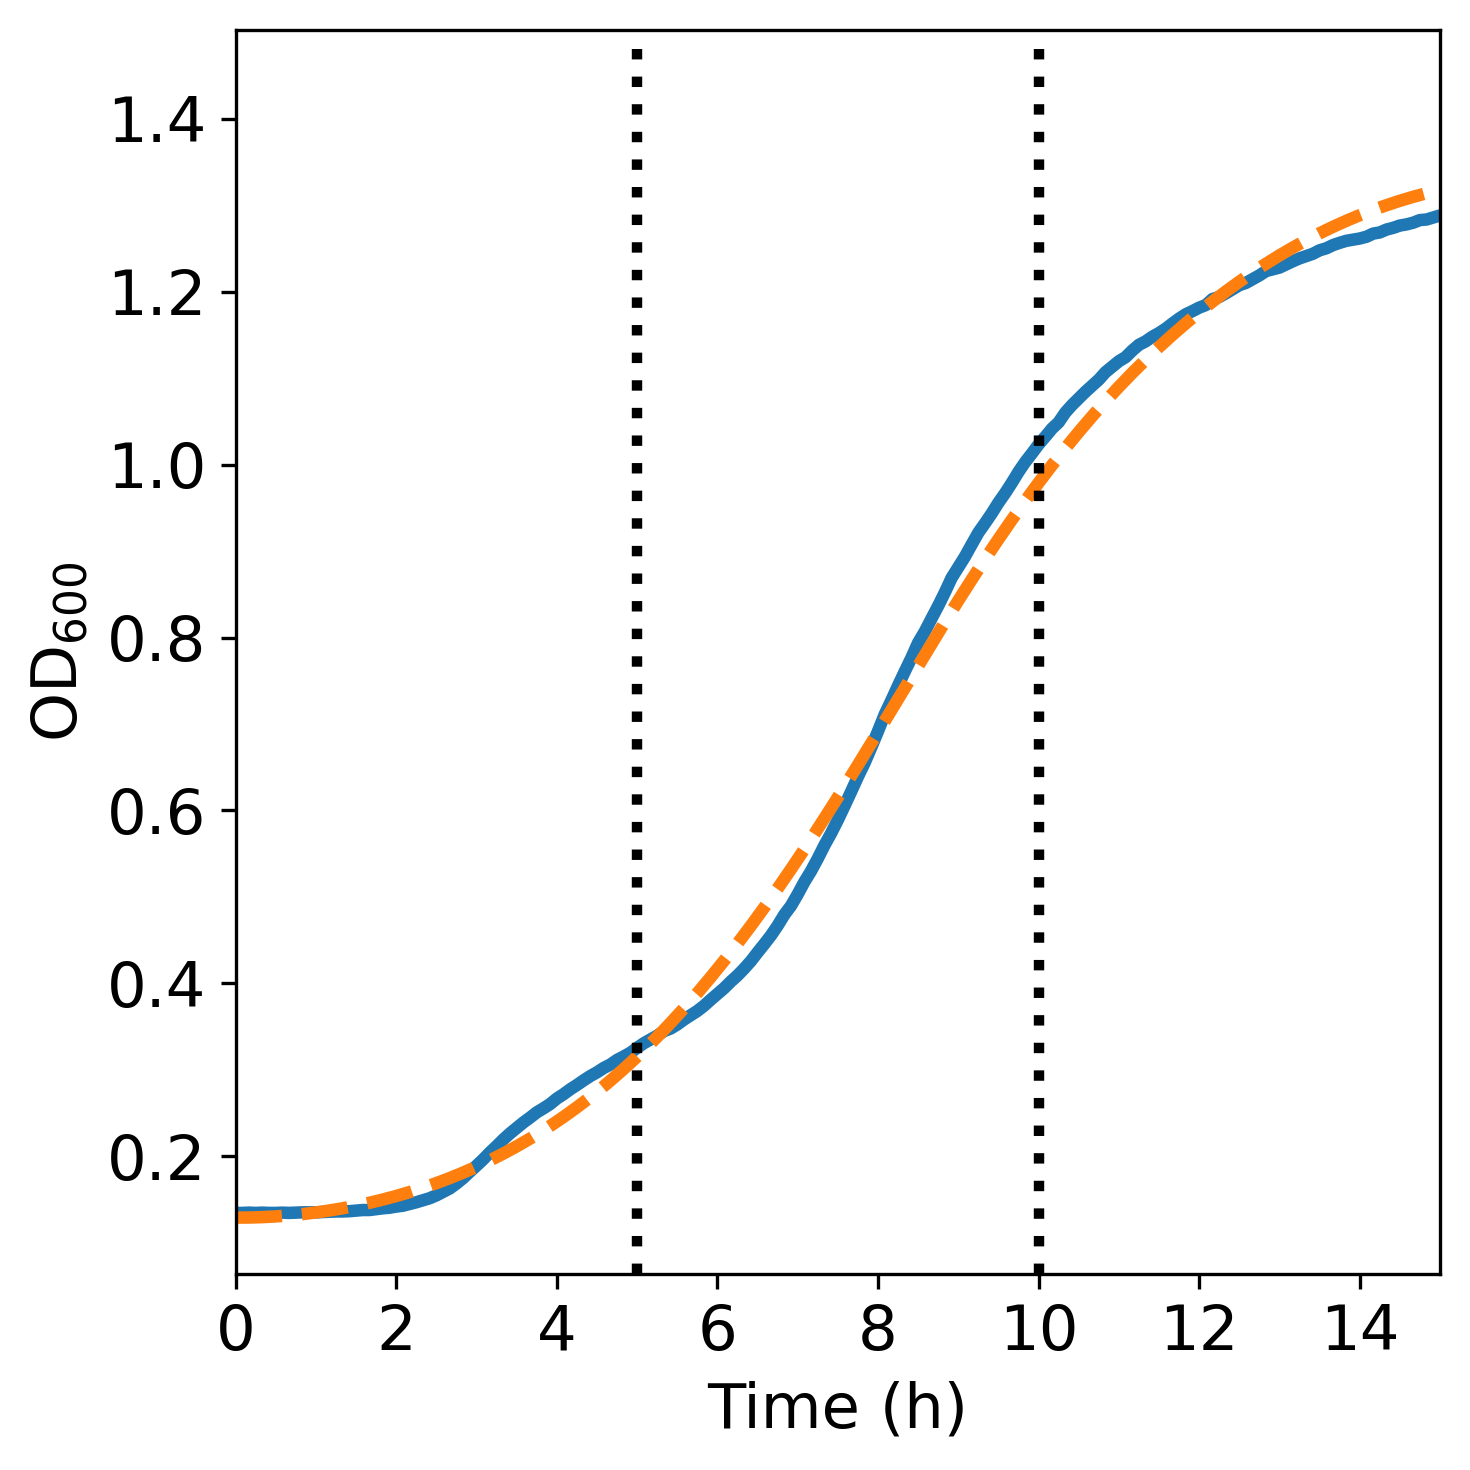

In [6]:

for strain in strains:

    if strain == 'Bacillus subtilis subspecies subtilis PY79':
        name = 'Bacillus subtilis PY79'
    else:
        name = strain
    savename = name.split(' ')[-1]
    
    fig,ax = plt.subplots(dpi=300,figsize =(5,5))

    vals = np.array(df_OD[strain])
    vals = [exp(v) for v in vals]
    ax.plot(df_OD['Time'],vals,linewidth=3)
    
    vals = np.array(df_spline[strain])
    vals = [exp(v) for v in vals]
    ax.plot(df_spline['Time'],vals,linewidth=3,linestyle='--')
    
    ax.set_xlabel('Time (h)',fontsize=15)
    ax.set_ylabel('OD$_{600}$',fontsize=15)
    ax.set_xlim(0,15)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
    ax.axvline(5,c='k',linewidth=2.5,linestyle=':')
    ax.axvline(10,c='k',linewidth=2.5,linestyle=':')

    fig.tight_layout()
    #fig.savefig(f'/Users/reyesmatte/Desktop/Imaging_paper/FigS5/{savename}_growthcurve.png')